### LightGBM
1. XGBoost 대비 장점
- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용
- 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등 사용없이 카테고리형 피처 최적으로 변환하고 이에 따른 노드 분할 수행)
 
2. LightGBM 트리 분할 방식 - 리프 중심

3. LightGBM 하이퍼 파라미터

4. 트리 분할 방식이 리프 중심이기 때문에, 하이퍼 파라미터도 num_leaves가 max_depth 보다 더 중요.


In [11]:
import lightgbm
print(lightgbm.__version__)

3.3.2


### LightGBM 적용 – 위스콘신 Breast Cancer Prediction

In [2]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리  
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.1, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_val, y_val)] # 검증용 데이터셋.  evals = [(X_tr, y_tr), (X_val, y_val)] 이렇게 써도 됨.
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test) # 111에서 끝났다 -> early_stopping이 50이니까 최대 성능은 111-50에서 61이다.
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.628248
[2]	valid_0's binary_logloss: 0.601106
[3]	valid_0's binary_logloss: 0.577587
[4]	valid_0's binary_logloss: 0.556324
[5]	valid_0's binary_logloss: 0.537407
[6]	valid_0's binary_logloss: 0.519401
[7]	valid_0's binary_logloss: 0.502637
[8]	valid_0's binary_logloss: 0.488311
[9]	valid_0's binary_logloss: 0.474664
[10]	valid_0's binary_logloss: 0.461267
[11]	valid_0's binary_logloss: 0.444274
[12]	valid_0's binary_logloss: 0.432755
[13]	valid_0's binary_logloss: 0.421371
[14]	valid_0's binary_logloss: 0.411418
[15]	valid_0's binary_logloss: 0.402989
[16]	valid_0's binary_logloss: 0.393973
[17]	valid_0's binary_logloss: 0.384801
[18]	valid_0's binary_logloss: 0.376191
[19]	valid_0's binary_logloss: 0.368378
[20]	valid_0's binary_logloss: 0.362062
[21]	valid_0's binary_logloss: 0.355162
[22]	valid_0's binary_logloss: 0.348933
[23]	valid_0's binary_logloss: 0.342819
[24]	valid_0's binary_logloss: 0.337386
[25]	valid_0's binary_logloss: 0.331523
[26]	vali

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [9]:
# 보면 XGBoost보다 성능이 약간 떨어진다.
# 이유는 데이터 세트가 작아서이다. lighGBM은 특히 데이터셋이 작으면 성능이 좀 더 떨어지는 경향이 있어보인다.
# 캐글보면 XGBoost보다 lightGMB을 더 많이 쓰고, 성능도 좋아보이는 것을 알 수 있다.
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9877


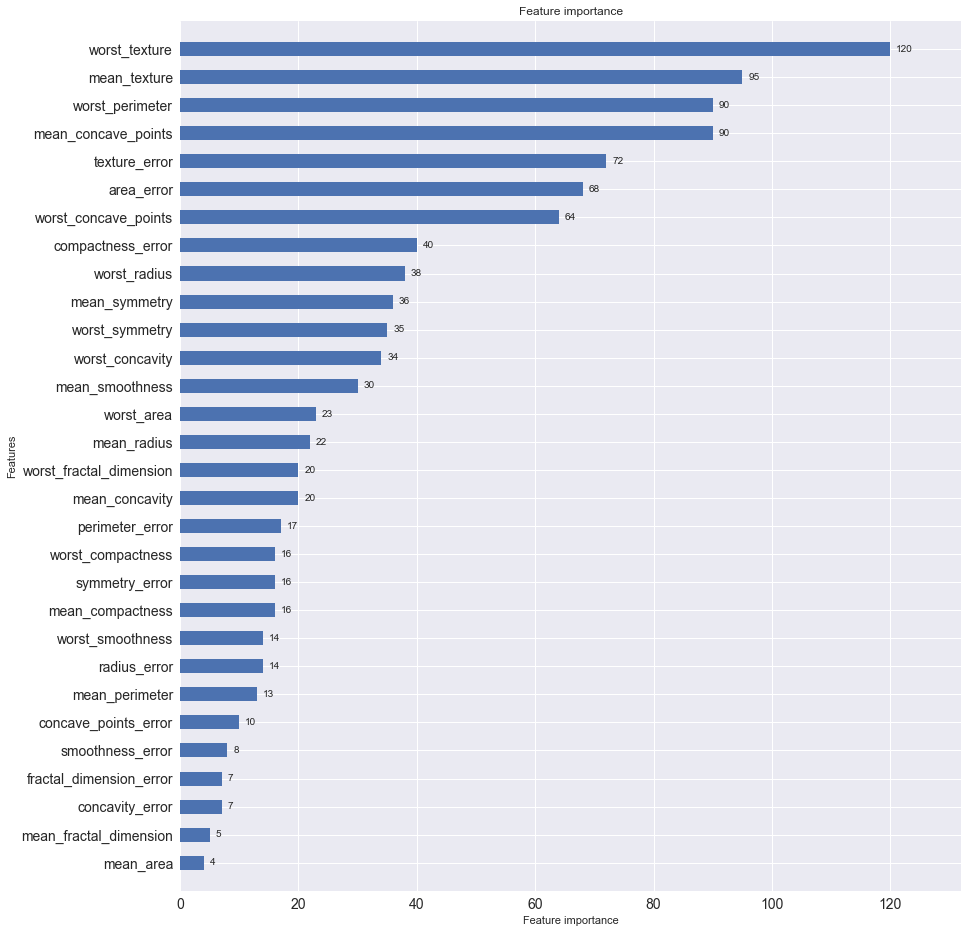

In [10]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn') # 그래프 스타일
fig, ax = plt.subplots(figsize=(14, 16)) # ax가 그림그리는 부분이다.
ax.tick_params(labelsize=14)
plot_importance(lgbm_wrapper, ax=ax, height=0.5)
plt.show()